In [1]:
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np

In [2]:
mnist_trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=None)

In [3]:
mnist_testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=None)

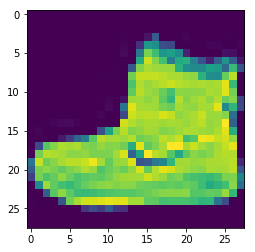

In [4]:
import matplotlib.pyplot as plt
plt.imshow(np.array(mnist_trainset[0][0].getdata()).reshape(28,28))

make the mnist data usable

In [5]:
train_xy = [np.hstack( (x.getdata(),[y]) ) for x,y in mnist_trainset ]
test_xy = [np.hstack( (x.getdata(),[y]) ) for x,y in mnist_testset ]
raw_test_data = [np.array(x[0].getdata()) for x in mnist_testset]

binarize the data

In [6]:
for x in range(len(train_xy)):
    for i in range(784):
        if train_xy[x][i] > 50:
            train_xy[x][i] = 1
        else:
            train_xy[x][i] = 0

extract test labels

In [7]:
test_labels = [test_xy[x][-1] for x in range(len(test_xy))]

In [8]:
print(test_labels)

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 6, 2, 2, 4, 4, 1, 4, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 4, 5, 6, 9, 2, 6, 8, 6, 4, 2, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 3, 0, 6, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 4, 2, 4, 9, 1, 6, 4, 8, 2, 6, 5, 4, 6, 7, 7, 7, 3, 3, 7, 0, 

In [9]:
for x in range(len(raw_test_data)):
    for i in range(784):
        if raw_test_data[x][i] > 50:
            raw_test_data[x][i] = 1
        else:
            raw_test_data[x][i] = 0

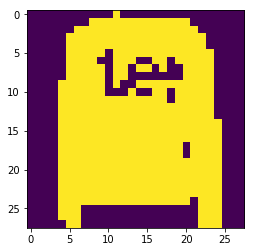

In [10]:
plt.imshow(raw_test_data[1][0:784].reshape(28,28))

In [11]:
raw_test_data[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

Add np.nan so the SPN can guess the last point

In [12]:
Nulls = np.array(np.nan)
for x in range(len(raw_test_data)-1):
    Nulls = np.append(Nulls,np.nan)

In [13]:
ftest_data = np.array(raw_test_data).reshape(-1,784)

In [14]:
print((Nulls.shape))
print((ftest_data.shape))

(10000,)
(10000, 784)


In [15]:
Nulls = Nulls.reshape(10000,1)

In [16]:
ftest_data = np.append(raw_test_data,Nulls, axis = 1)

In [17]:
ftest_data[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

Reshape the data into an array

In [18]:
train_xy = np.array(train_xy).reshape(-1,785)
test_xy = np.array(test_xy).reshape(-1,785)

Make the train data smaller because it takes too long to run SPN

In [19]:
train_xy1 = train_xy[:1000]

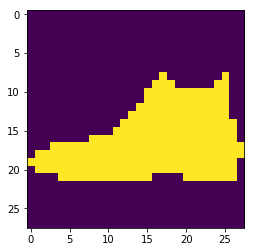

In [20]:
plt.imshow(ftest_data[0][0:784].reshape(28,28))

Run the SPN on the Maximum number of iterations

In [21]:
from spn.algorithms.LearningWrappers import learn_parametric, learn_classifier
from spn.structure.leaves.parametric.Parametric import Categorical, Gaussian
from spn.structure.Base import Context
spn_classification = learn_classifier(train_xy1,
                       Context(parametric_types=[Categorical for i in range(785)]).add_domains(train_xy1),
                       learn_parametric, 784)


Check if the SPN is valid

In [22]:
from spn.algorithms.Validity import is_valid
print(is_valid(spn_classification))

(True, None)


In [23]:
from spn.algorithms.Statistics import get_structure_stats
print(get_structure_stats(spn_classification))

---Structure Statistics---
# nodes             7861
    # sum nodes     1
    # prod nodes    10
    # leaf nodes    7850
# edges             7860
# layers            3


In [24]:
from spn.algorithms.Marginalization import marginalize

spn_marg = marginalize(spn_classification, [1,2])

In [25]:
from spn.io.Text import spn_to_str_equation
txt = spn_to_str_equation(spn_marg)
print(txt)

(0.1070000000000001*((Categorical(V1|p=[1.0]) * Categorical(V2|p=[1.0, 0.0]))) + 0.104*((Categorical(V1|p=[1.0]) * Categorical(V2|p=[1.0, 0.0]))) + 0.086*((Categorical(V1|p=[1.0]) * Categorical(V2|p=[0.9883720930232558, 0.011627906976744186]))) + 0.092*((Categorical(V1|p=[1.0]) * Categorical(V2|p=[1.0, 0.0]))) + 0.095*((Categorical(V1|p=[1.0]) * Categorical(V2|p=[1.0, 0.0]))) + 0.1*((Categorical(V1|p=[1.0]) * Categorical(V2|p=[1.0, 0.0]))) + 0.1*((Categorical(V1|p=[1.0]) * Categorical(V2|p=[1.0, 0.0]))) + 0.115*((Categorical(V1|p=[1.0]) * Categorical(V2|p=[1.0, 0.0]))) + 0.102*((Categorical(V1|p=[1.0]) * Categorical(V2|p=[1.0, 0.0]))) + 0.099*((Categorical(V1|p=[1.0]) * Categorical(V2|p=[1.0, 0.0]))))


In [26]:
ftest_data[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [27]:
from spn.algorithms.MPE import mpe
predictions = mpe(spn_classification, ftest_data)

In [28]:
from sklearn.metrics import accuracy_score
print("accuracy:")
print(accuracy_score(test_labels, predictions[:,-1:]))
print("actuals:")
print(test_labels[:10])
print("predictions:")
print(predictions[:10,-1:])

accuracy:
0.6828
actuals:
[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]
predictions:
[[9.]
 [2.]
 [1.]
 [1.]
 [6.]
 [1.]
 [6.]
 [6.]
 [5.]
 [7.]]


lower threshold for binarization provides a higher accuracy